# Population statistics

Our goal is to find such strategies attributes that will allow us to predict that a strategy have a chance to achieve high profits and low volatility in the future.

'Future' means after 7, 14, 21, 30, 60, 90, ..., 360 days from today. 

We will calculate a whole Collective2 strategies population data: Rate of change (ROC) after 7, 14, ..., 360 from today.

Then, we select a sample of strategies by some attribute and make a statistical hypothesis test: Is ROC of the selected sample higher than the ROC of the population?

Similarly, we calculate volatility of ROC of population and make a test, if the volatility of sample ROC is less than the volatility of the population.

To do that, we calculate averages and standard deviations (SD) of ROC of the whole C2 strategies population and define our metric which allows to compare results. We are trying to find a set of strategies with higer average and lower SD than the population stats.

Mathematicaly it is a ratio: `Return / SD(Return)`

Let's get this ratio as our metric and denote it **Mtrc01** in this research. (We can develop other metrics later.)

An input to the population statistics calculation are strategies older than 90 days. It means 3 months, 60 working days. The reason is that we need some time to accumulate informations about strategies. Specifically, we need some minimal number of observations which allows us to calculate reliable statistics. 

Working on this research, I have found that we have a large number of strategies which do not survive 3 months. We have even a significant number of strategies that do not survive 7, 14, ... days or 1-2 months. Such strategies create just white noise which disrupts statistics.

So do not forget that SQL commands selecting data from the database should contain a condition `Age > 90` if you are working with statistics which needs a minimal number of observations.

See [Math](./Mtrc01_Doc_Math.ipynb).



In [1]:
source("JupyterUtils.R")
source("C2ScorePopulationReturnsData.R")

In [2]:
data = getPopulationStatsData()
data$byRows

ROC_Days,Mean,SD,Observations,Mtrc01
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,0.001366673,0.04837497,683972,0.028
14,0.003191826,0.06591050,667157,0.048
21,0.005326243,0.07882594,650387,0.068
30,0.008339215,0.09290370,628911,0.090
60,0.019664206,0.12843530,558462,0.153
90,0.032810462,0.15579799,489309,0.211
120,0.046858041,0.17883872,428541,0.262
150,0.060728186,0.20017739,378633,0.303
180,0.075015554,0.22062427,337269,0.340


30 days returns: Number of observations = 669472  SD =  0.09901114 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.9990519 -0.0192031 -0.0001648  0.0063527  0.0389428  0.9575920 


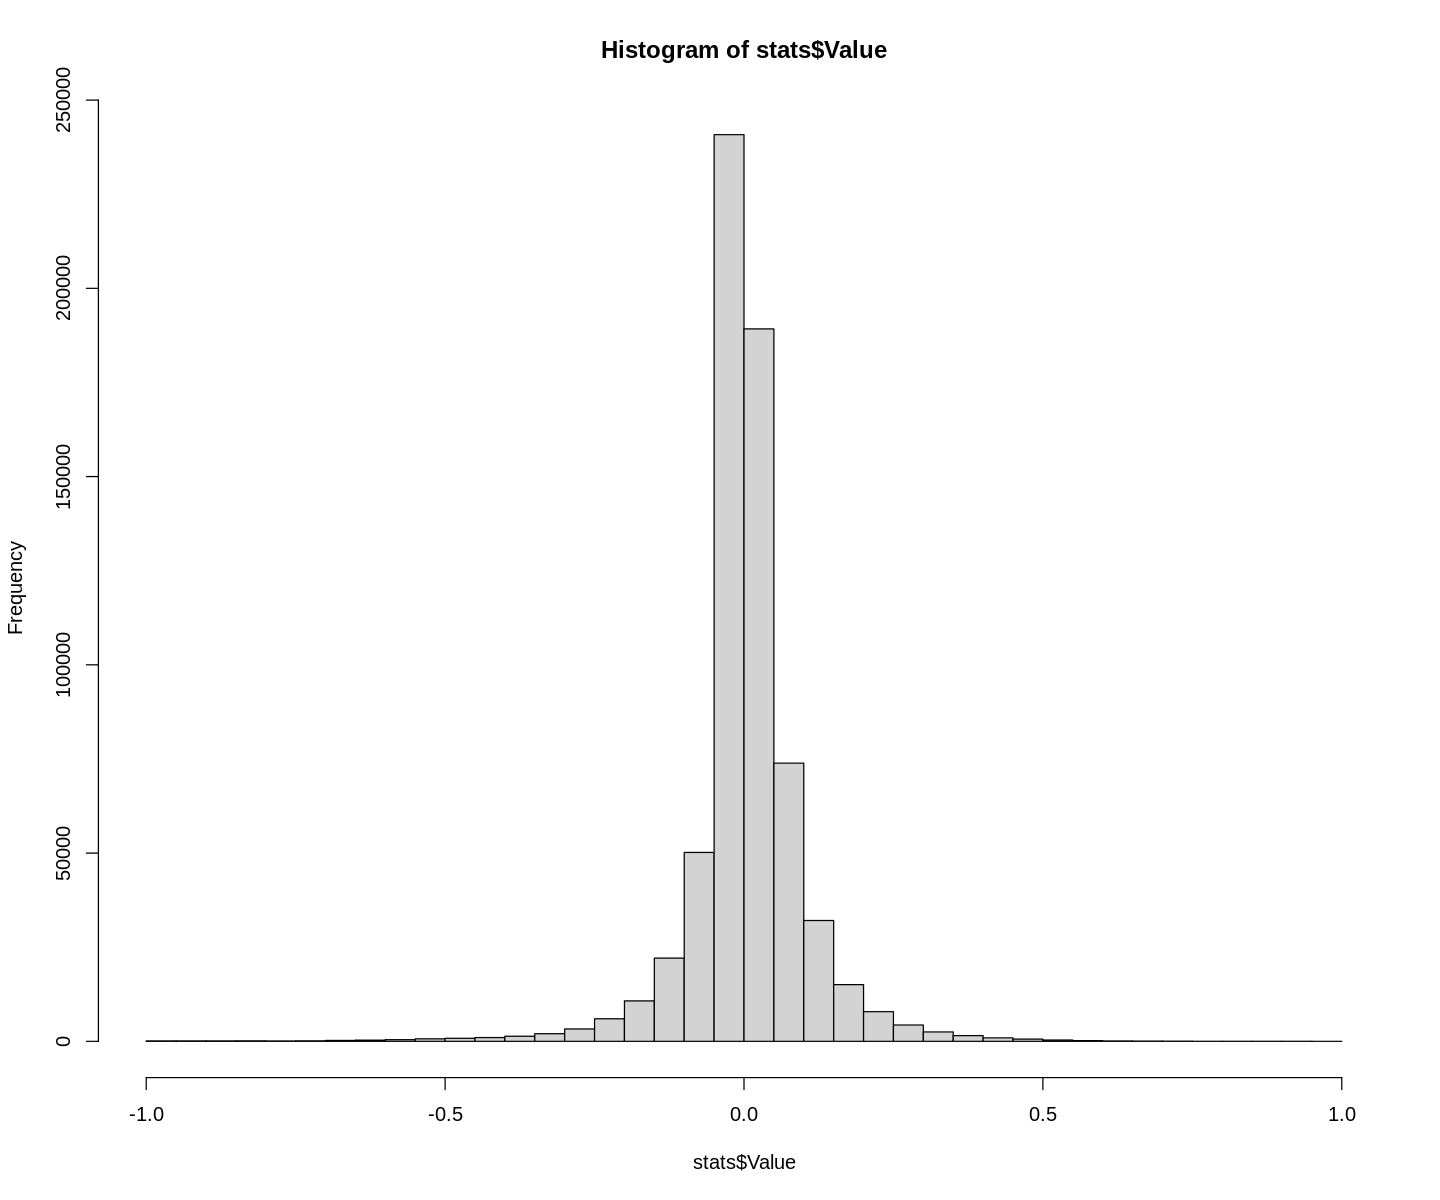

In [3]:
stats = getC2ScoreDbData("select Return030 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity030 is not null and Equity030 > 0")
cat("30 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

60 days returns: Number of observations = 565942  SD =  0.129747 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.997395 -0.022458  0.003569  0.019255  0.065378  1.616109 


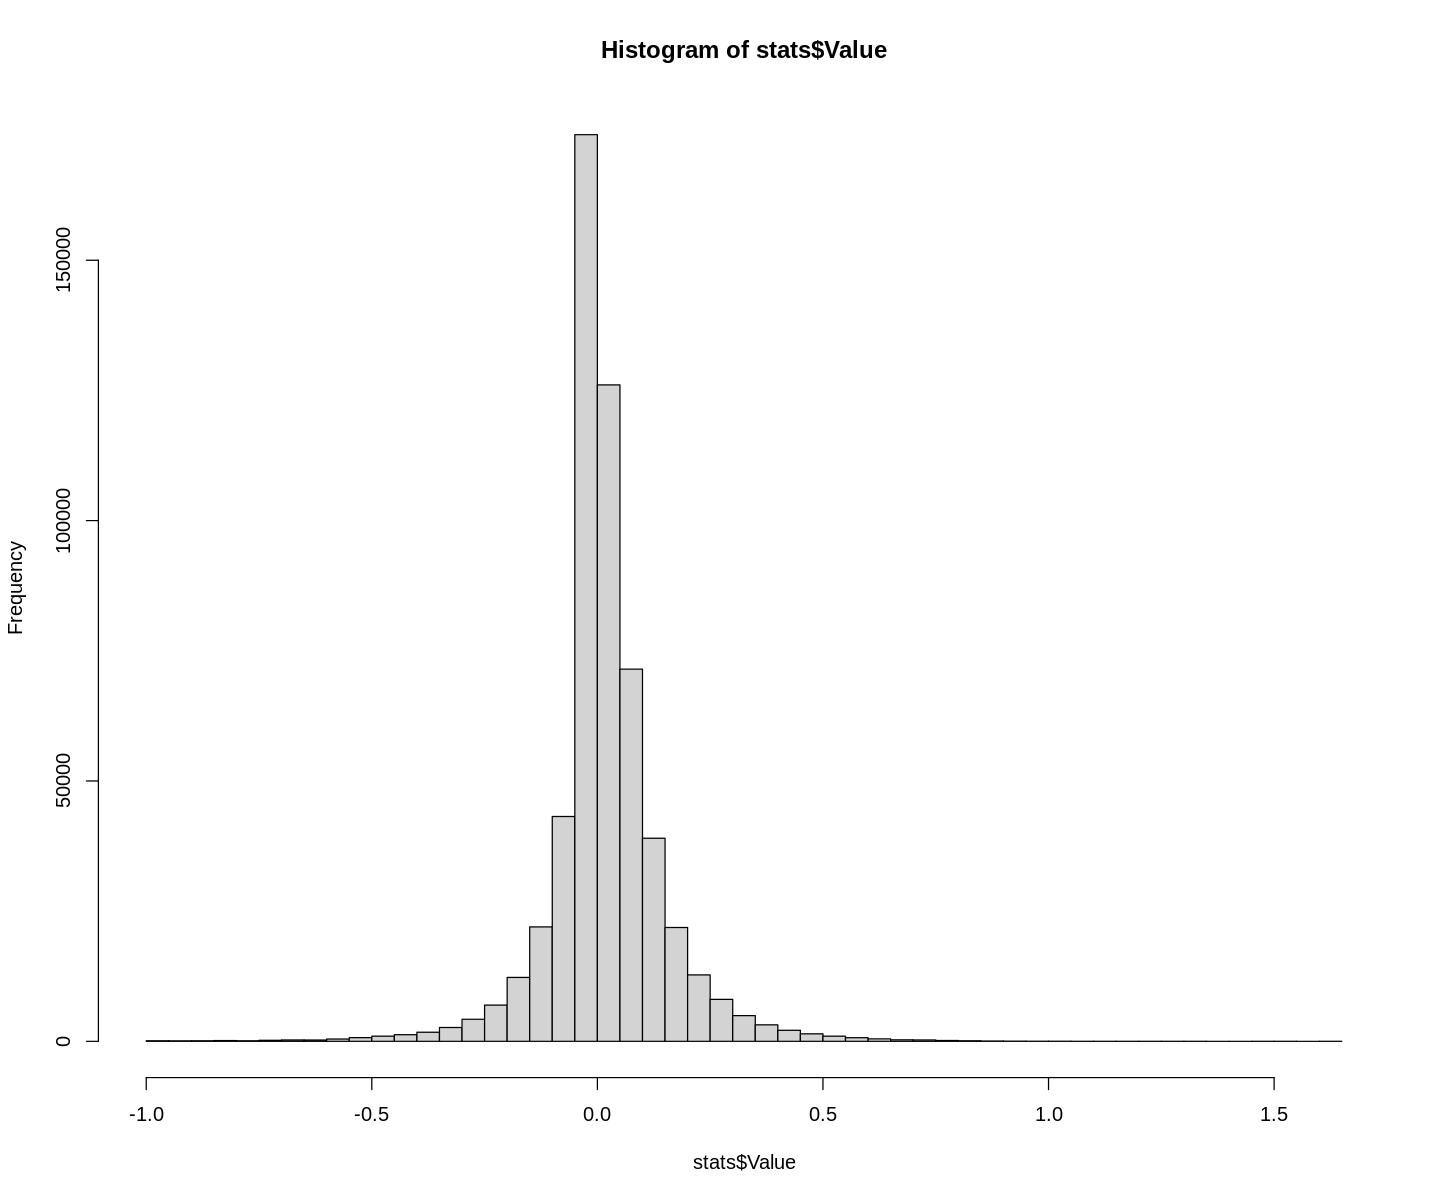

In [4]:
stats = getC2ScoreDbData("select Return060 as Value from ReturnsDataInIntervalsCleaned where 
                         Equity060 is not null and Equity060 > 0")
cat("60 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

90 days returns: Number of observations = 489395  SD =  0.1558005 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.995141 -0.022647  0.009982  0.032829  0.089489  1.654651 


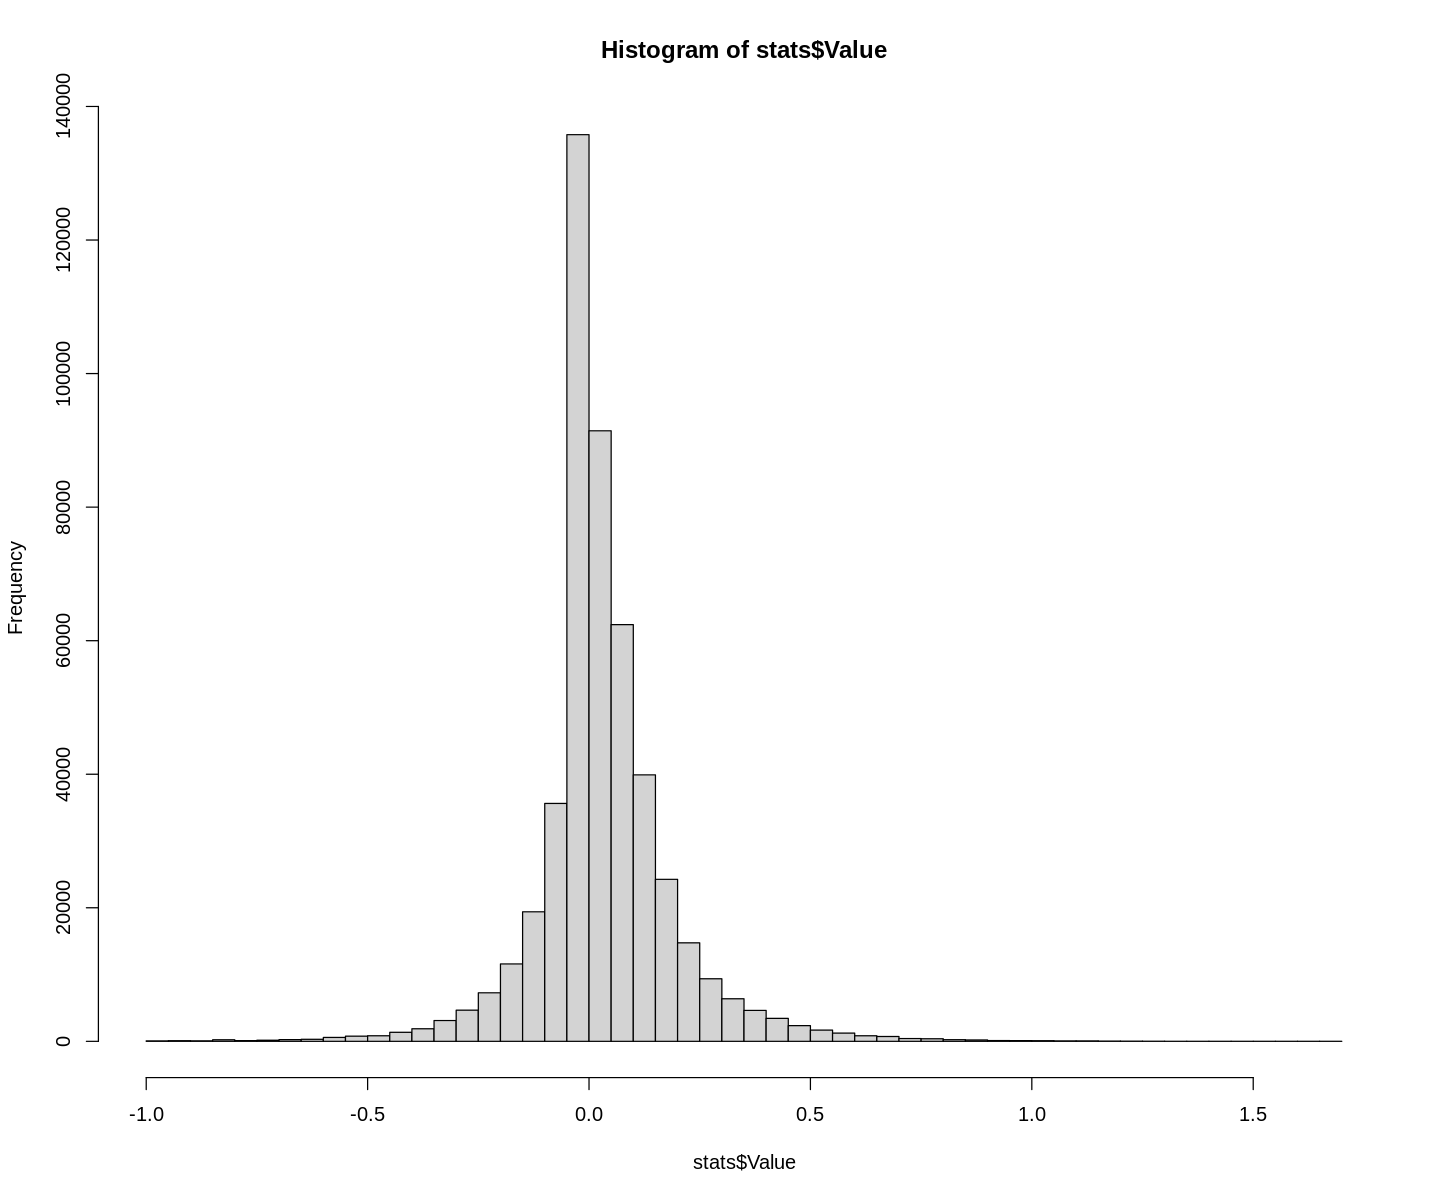

In [5]:
stats = getC2ScoreDbData("select Return090 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity090 is not null and Equity090 > 0")
cat("90 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

120 days returns: Number of observations = 428597  SD =  0.1788416 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98917 -0.02226  0.01715  0.04688  0.11192  1.91412 


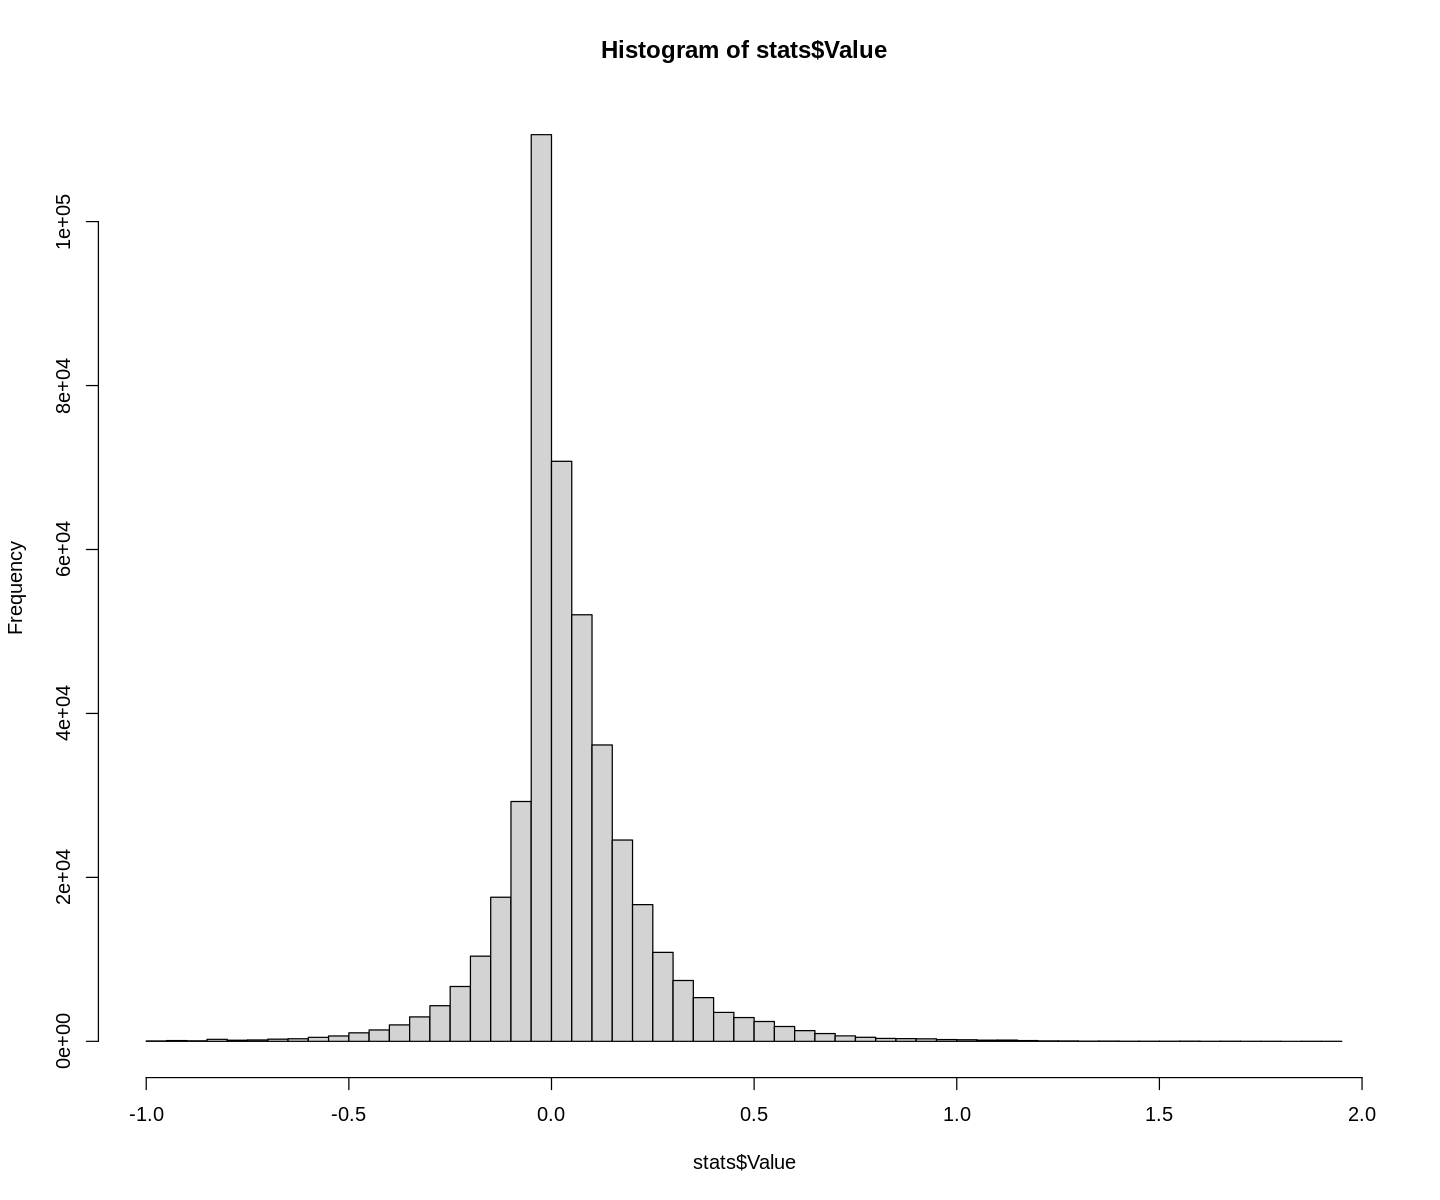

In [6]:
stats = getC2ScoreDbData("select Return120 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity120 is not null and Equity120 > 0")
cat("120 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

150 days returns: Number of observations = 378659  SD =  0.2001822 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98888 -0.02096  0.02393  0.06075  0.13360  1.84215 


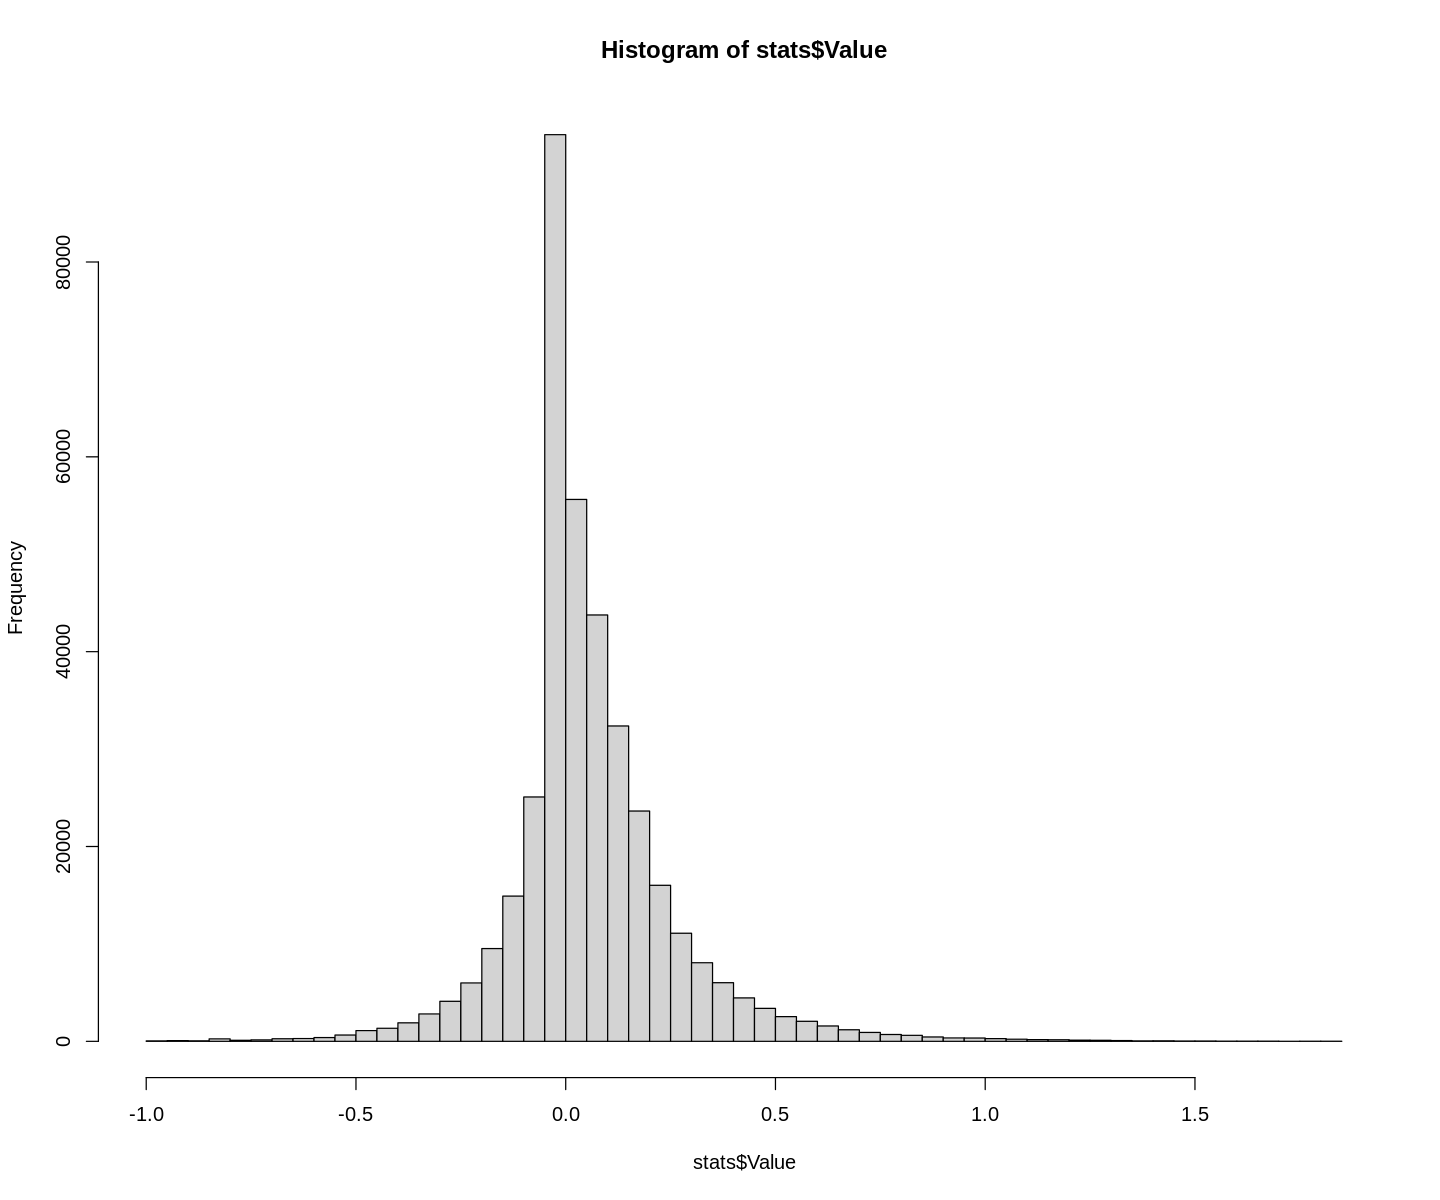

In [7]:
stats = getC2ScoreDbData("select Return150 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity150 is not null and Equity150 > 0")
cat("150 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

180 days returns: Number of observations = 337269  SD =  0.2206243 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98882 -0.02135  0.03064  0.07502  0.15299  1.90458 


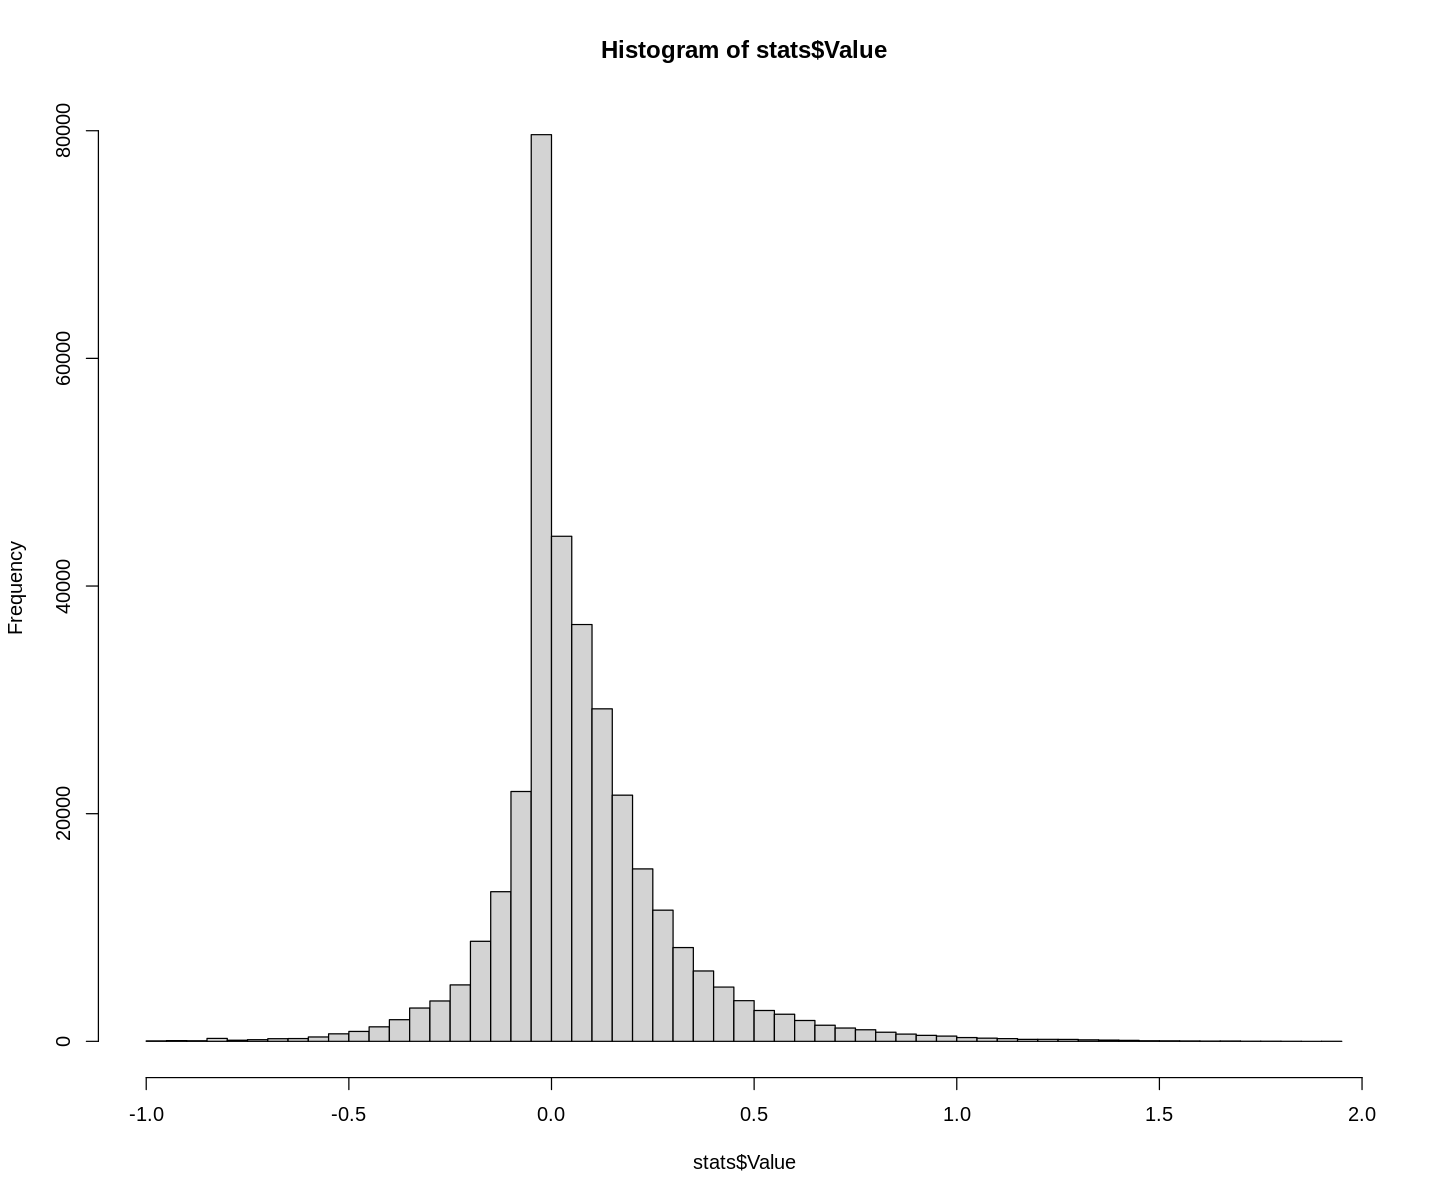

In [8]:
stats = getC2ScoreDbData("select Return180 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity180 is not null and Equity180 > 0")
cat("180 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

210 days returns: Number of observations = 301878  SD =  0.2412498 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98957 -0.02297  0.03671  0.08988  0.17457  2.00524 


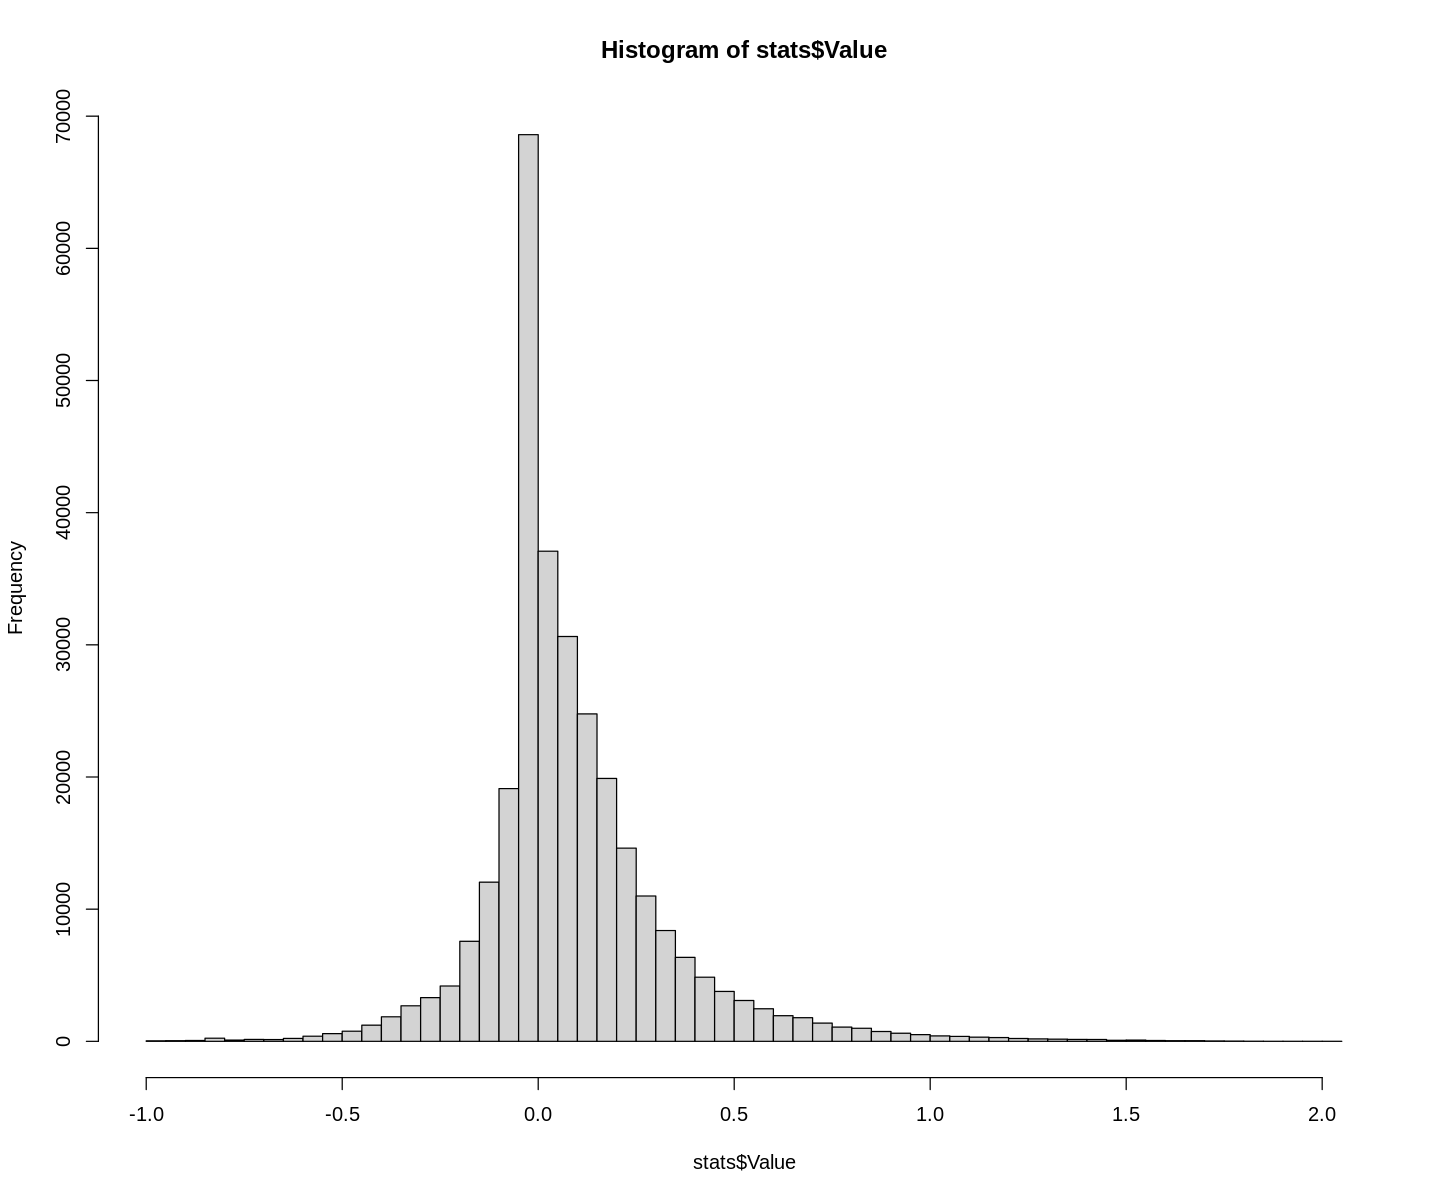

In [9]:
stats = getC2ScoreDbData("select Return210 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity210 is not null and Equity210 > 0")
cat("210 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

240 days returns: Number of observations = 270949  SD =  0.2641272 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98917 -0.02315  0.04503  0.10518  0.19615  2.62756 


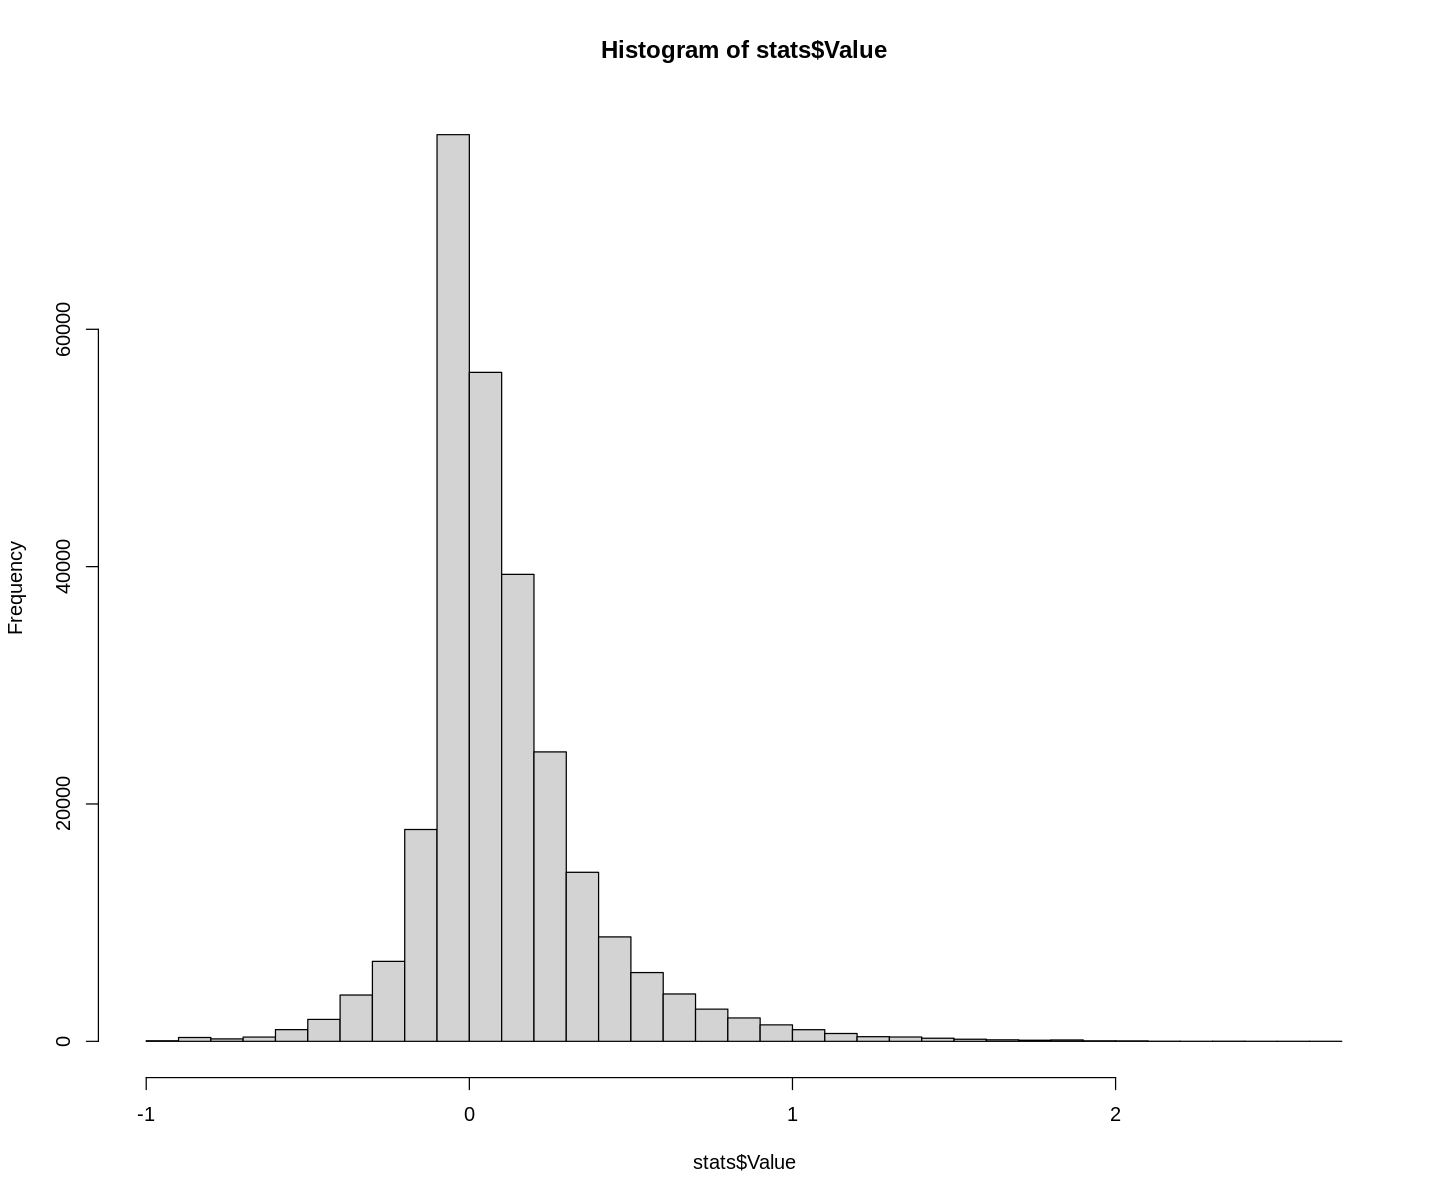

In [10]:
stats = getC2ScoreDbData("select Return240 as Value from ReturnsDataInIntervalsCleaned 
                                 where Equity240 is not null and Equity240 > 0")
cat("240 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

270 days returns: Number of observations = 243209  SD =  0.2869761 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98854 -0.02344  0.05307  0.12113  0.21999  3.29189 


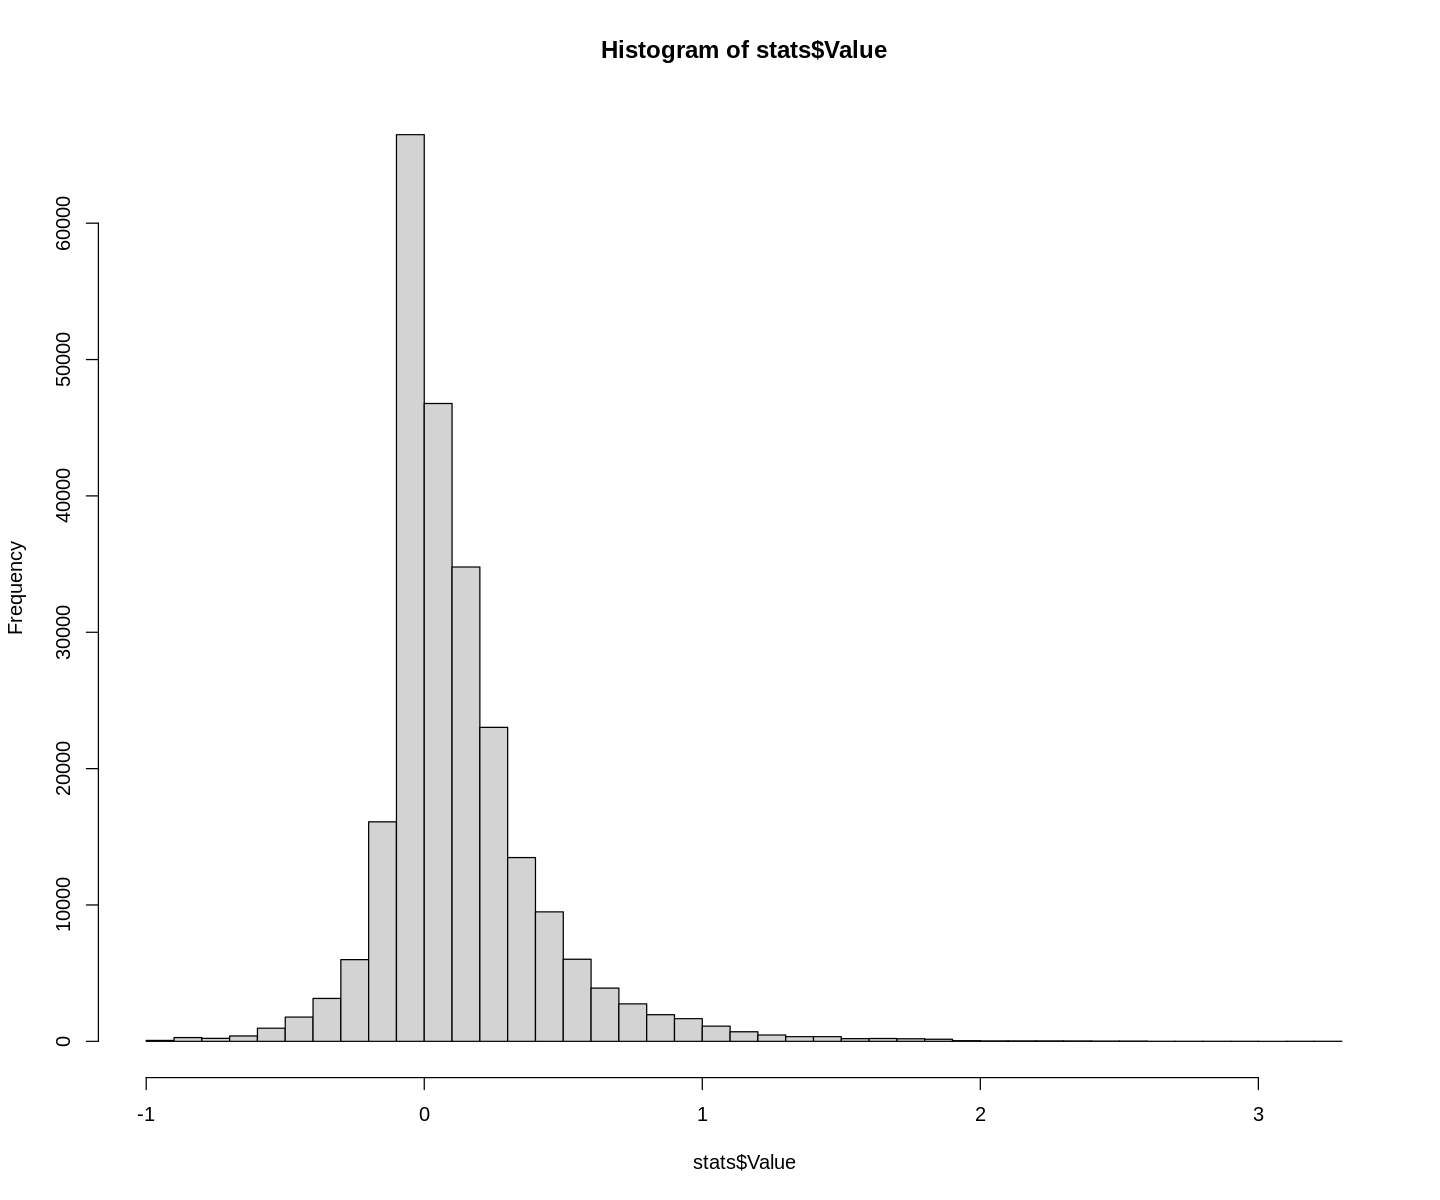

In [11]:
stats = getC2ScoreDbData("select Return270 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity270 is not null and Equity270 > 0")
cat("270 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)

300 days returns: Number of observations = 218709  SD =  0.308683 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98523 -0.02188  0.06221  0.13614  0.24209  3.44715 


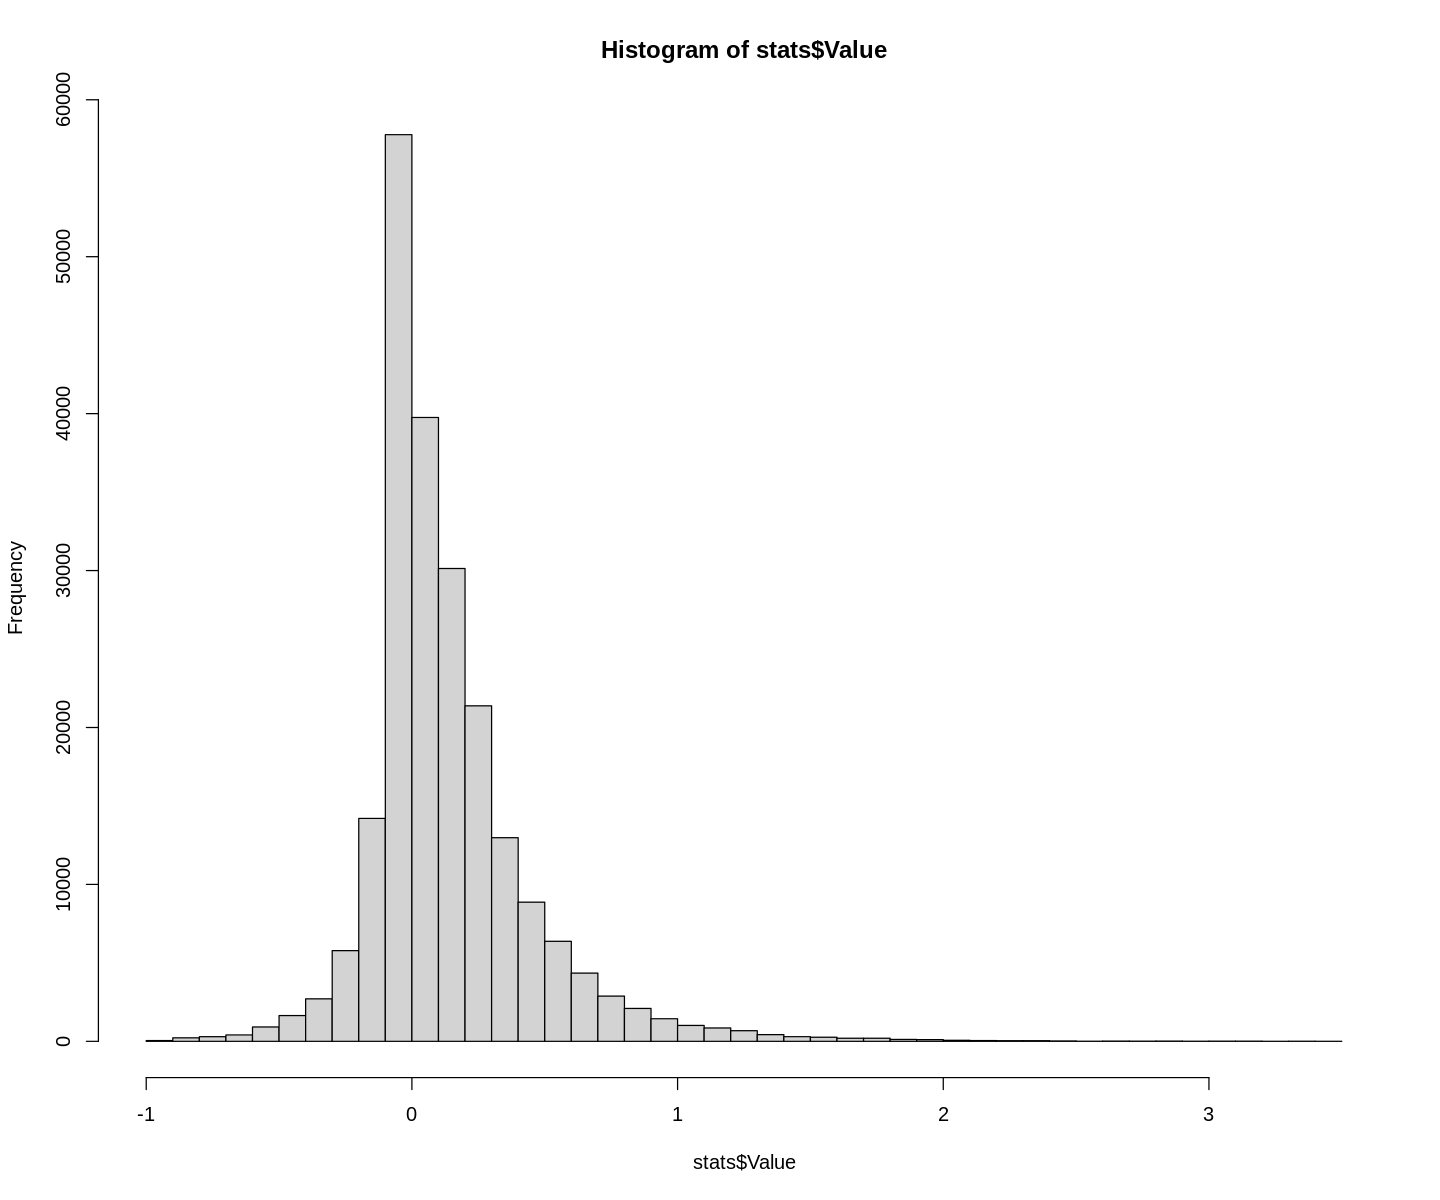

In [12]:
stats = getC2ScoreDbData("select Return300 as Value from ReturnsDataInIntervalsCleaned 
                          where Equity300 is not null and Equity300 > 0")
cat("300 days returns: Number of observations =",NROW(stats)," SD = ",sd(stats$Value),"\n\n")
print(summary(stats$Value))
hist(stats$Value,breaks=50)